# Library Import and Data Loading

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import os
from lstm import (load_and_preprocess_nusax_sentiment, train_and_evaluate_lstm_variant,
                  LSTMFromScratch, ManualSGD, ManualSparseCategoricalCrossentropy,
                  calculate_f1_macro, build_lstm_model)

In [38]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), num_classes, vocab_size, text_vectorizer = load_and_preprocess_nusax_sentiment(max_features=10000, maxlen=200)

MAX_LEN = 200
EMBEDDING_DIM = 128

Loading NusaX sentiment data...
Labels encoded. Classes: ['negative' 'neutral' 'positive'] -> [0 1 2]
Vocabulary size: 2836 (max_features was 10000)
x_train shape: (500, 200), y_train shape: (500,)
x_val shape: (100, 200), y_val shape: (100,)
x_test shape: (400, 200), y_test shape: (400,)
Number of classes: 3


In [39]:
results = {}
best_f1 = -1
best_keras_lstm = None

analysis_epochs = 20

# Hyperparameter analysis

## 1. Analisis Pengaruh Jumlah Layer LSTM


=== 1. Analisis Pengaruh Jumlah Layer LSTM ===
Epoch 1/20


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.3624 - loss: 1.0915 - val_accuracy: 0.3800 - val_loss: 1.0801
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.3330 - loss: 1.0837 - val_accuracy: 0.3800 - val_loss: 1.0795
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.3921 - loss: 1.0813 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3864 - loss: 1.0790 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4472 - loss: 1.0647 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.3849 - loss: 1.0763 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3826 - loss: 1.0966 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3796 - loss: 1.0824 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 9/20


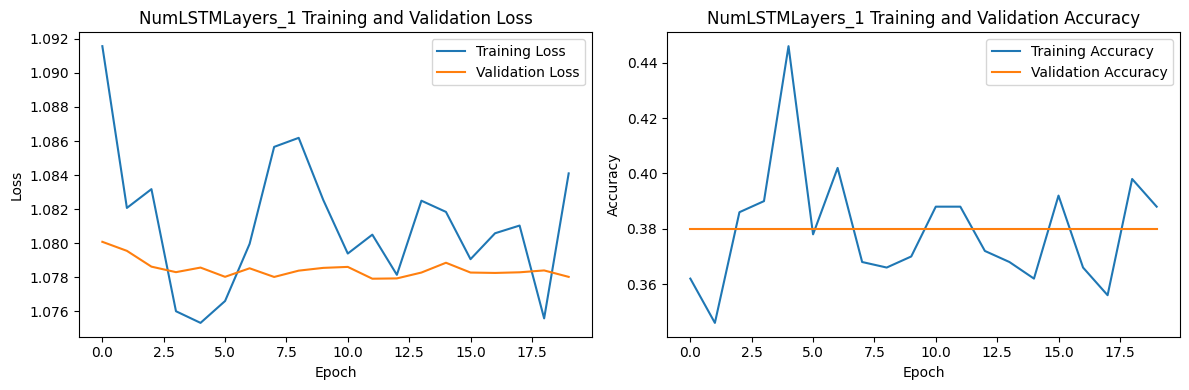

F1-Score for NumLSTMLayers_1: 0.1844
Epoch 1/20


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.3715 - loss: 1.0859 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.4291 - loss: 1.0724 - val_accuracy: 0.3800 - val_loss: 1.0801
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.4133 - loss: 1.0804 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3623 - loss: 1.0918 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.3929 - loss: 1.0749 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.4155 - loss: 1.0754 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.3956 - loss: 1.0720 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.4148 - loss: 1.0785 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoc

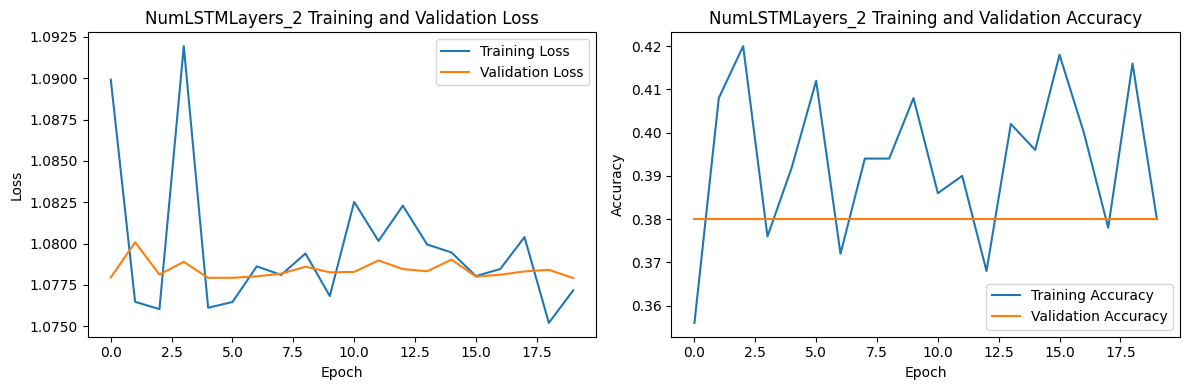

F1-Score for NumLSTMLayers_2: 0.1844
Epoch 1/20


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.3101 - loss: 1.0951 - val_accuracy: 0.3800 - val_loss: 1.0791
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.3624 - loss: 1.0871 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.3531 - loss: 1.0810 - val_accuracy: 0.3800 - val_loss: 1.0800
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.4077 - loss: 1.0776 - val_accuracy: 0.3800 - val_loss: 1.0791
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.4218 - loss: 1.0816 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.3380 - loss: 1.0881 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.4574 - loss: 1.0623 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.3347 - loss: 1.0954 - val_accuracy: 0.3800 - val_loss: 1.0794
Epo

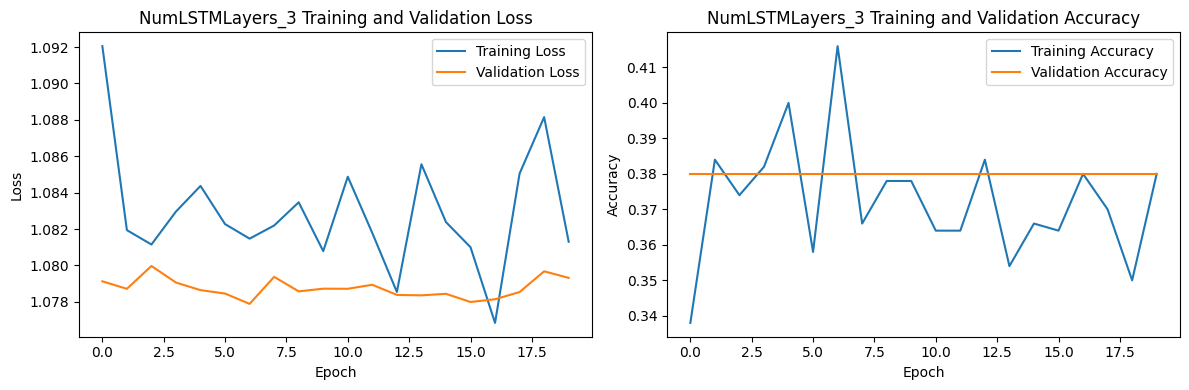

F1-Score for NumLSTMLayers_3: 0.1844


In [ ]:
print("\n=== 1. Analisis Pengaruh Jumlah Layer LSTM ===")
num_lstm_layer_variations = [
    [{'units': 64, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': True}, {'units': 32, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': True}, {'units': 32, 'bidirectional': False, 'return_sequences': True}, {'units': 16, 'bidirectional': False, 'return_sequences': False}]
]
for i, config in enumerate(num_lstm_layer_variations):
    desc = f"NumLSTMLayers_{i+1}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_lstm_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        lstm_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_lstm = keras_model_variant
        best_keras_lstm.save("best_keras_lstm_model.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    
    # Save plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{desc} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    acc_key = 'accuracy' if 'accuracy' in history.history else 'sparse_categorical_accuracy'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_sparse_categorical_accuracy'
    plt.plot(history.history[acc_key], label='Training Accuracy')
    plt.plot(history.history[val_acc_key], label='Validation Accuracy')
    plt.title(f'{desc} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")

Jumlah layer LSTM memengaruhi kemampuan model untuk menangkap dependensi temporal yang lebih kompleks dalam data teks. Hasil eksperimen menunjukkan bahwa penambahan jumlah layer dari satu layer (64 unit), dua layer (64+32 unit), hingga tiga layer (64+32+16 unit) menghasilkan F1-score yang identik, yaitu 0.1844 untuk ketiga konfigurasi. Hal ini menunjukkan bahwa penambahan layer tidak memberikan peningkatan performa pada dataset NusaX-Sentiment. Kemungkinan besar, dataset ini memiliki panjang sekuens yang relatif pendek (maksimum 200 token, tetapi rata-rata lebih rendah), sehingga satu layer LSTM sudah cukup untuk menangkap pola temporal yang relevan untuk klasifikasi sentimen. Penambahan layer meningkatkan kompleksitas model, tetapi tidak menghasilkan keuntungan signifikan, mungkin karena keterbatasan ukuran dataset atau sifat tugas klasifikasi sentimen yang tidak memerlukan pemodelan dependensi jarak jauh. Dalam hal ini, konfigurasi satu layer tampaknya sudah optimal untuk efisiensi dan performa.

## 2. Analisis Pengaruh Banyak Unit LSTM


=== 2. Analisis Pengaruh Banyak Unit LSTM ===
Epoch 1/20


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.3989 - loss: 1.0918 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3589 - loss: 1.0851 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3685 - loss: 1.0889 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4308 - loss: 1.0687 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3823 - loss: 1.0748 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3718 - loss: 1.0780 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4025 - loss: 1.0779 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3933 - loss: 1.0821 - val_accuracy: 0.3800 - val_loss: 1.0808
Epoch 9/20


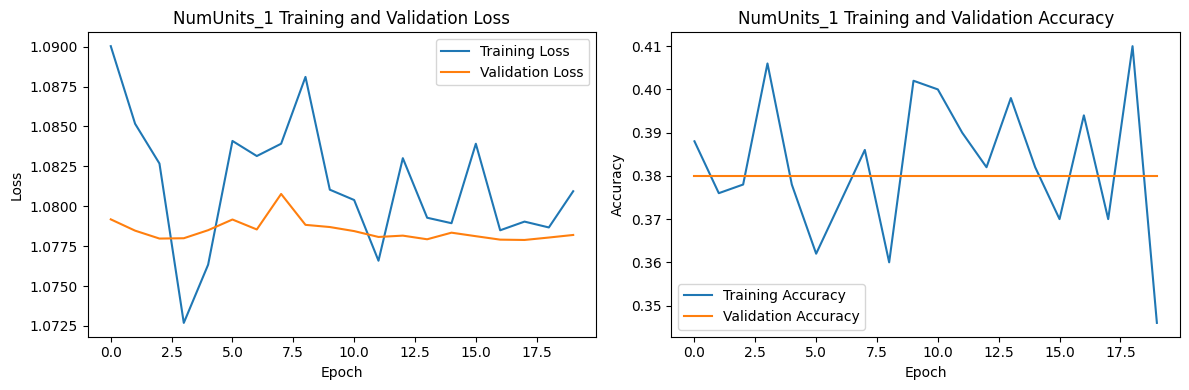

F1-Score for NumUnits_1: 0.1844
Epoch 1/20


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3841 - loss: 1.0893 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3955 - loss: 1.0865 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3979 - loss: 1.0800 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3840 - loss: 1.0788 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3476 - loss: 1.0955 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3814 - loss: 1.0774 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3564 - loss: 1.0700 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3799 - loss: 1.0937 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 9/20


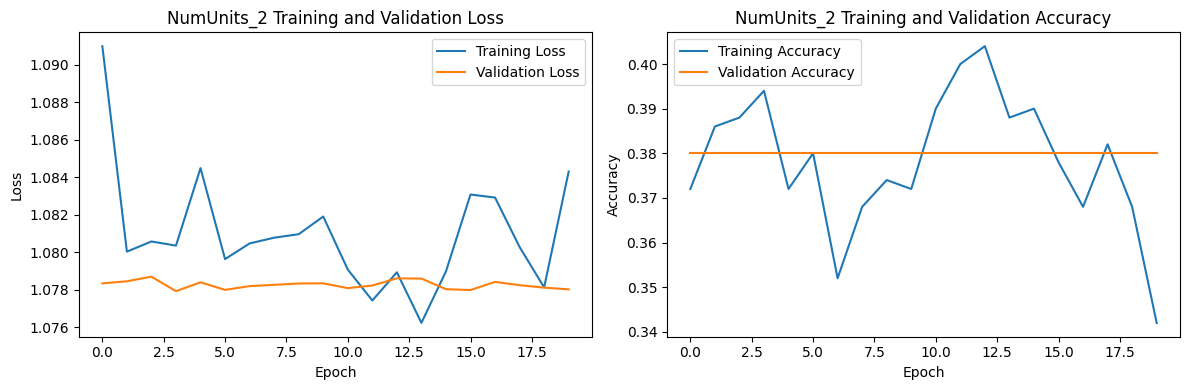

F1-Score for NumUnits_2: 0.1844


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.3666 - loss: 1.0870 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.3853 - loss: 1.0973 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.3755 - loss: 1.0819 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.3641 - loss: 1.0813 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4027 - loss: 1.0681 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.3759 - loss: 1.0853 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.3647 - loss: 1.0858 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4253 - loss: 1.0705 - val_accuracy: 0.3800 - val_loss:

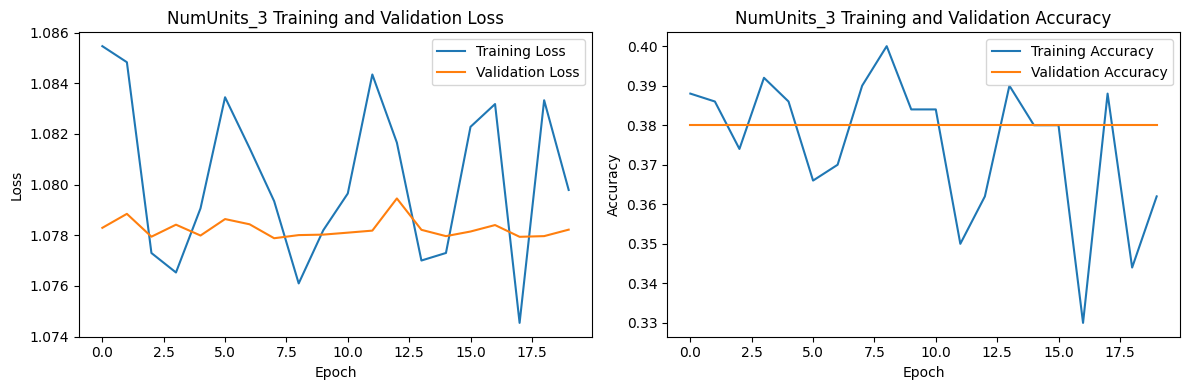

F1-Score for NumUnits_3: 0.1827


In [ ]:
print("\n=== 2. Analisis Pengaruh Banyak Unit LSTM ===")
unit_variations = [
    [{'units': 32, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 128, 'bidirectional': False, 'return_sequences': False}]
]
for i, config in enumerate(unit_variations):
    desc = f"NumUnits_{i+1}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_lstm_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        lstm_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_lstm = keras_model_variant
        best_keras_lstm.save("best_keras_lstm.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    
    # Save plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{desc} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    acc_key = 'accuracy' if 'accuracy' in history.history else 'sparse_categorical_accuracy'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_sparse_categorical_accuracy'
    plt.plot(history.history[acc_key], label='Training Accuracy')
    plt.plot(history.history[val_acc_key], label='Validation Accuracy')
    plt.title(f'{desc} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")

Jumlah unit dalam layer LSTM menentukan kapasitas model untuk merepresentasikan fitur dalam sekuens teks. Hasil eksperimen menunjukkan bahwa peningkatan jumlah unit dari 32 unit (F1-score 0.1844) ke 64 unit (F1-score 0.1827) dan 128 unit (F1-score 0.1827) tidak memberikan peningkatan performa yang berarti, bahkan sedikit menurun. Penurunan kecil ini mungkin disebabkan oleh kapasitas model yang berlebih pada 64 dan 128 unit, yang dapat menyebabkan overfitting pada dataset NusaX-Sentiment yang relatif sederhana. Dengan sekuens pendek dan tugas klasifikasi sentimen yang tidak terlalu kompleks, 32 unit tampaknya sudah cukup untuk menangkap pola sentimen utama. Peningkatan jumlah unit menambah parameter model, tetapi tanpa data yang cukup besar atau kompleksitas tugas yang lebih tinggi, efeknya cenderung minimal. Konfigurasi 32 unit memberikan keseimbangan terbaik antara kapasitas dan efisiensi dalam eksperimen ini.

## 3. Analisis Pengaruh Jenis LSTM (Unidirectional vs. Bidirectional)


=== 3. Analisis Pengaruh Jenis LSTM (Unidirectional vs. Bidirectional) ===
Epoch 1/20


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3620 - loss: 1.0905 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3664 - loss: 1.0716 - val_accuracy: 0.3800 - val_loss: 1.0802
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3893 - loss: 1.0794 - val_accuracy: 0.3800 - val_loss: 1.0794
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4051 - loss: 1.0758 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.3684 - loss: 1.0754 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3737 - loss: 1.0828 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.3955 - loss: 1.0741 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3662 - loss: 1.0896 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 9/20


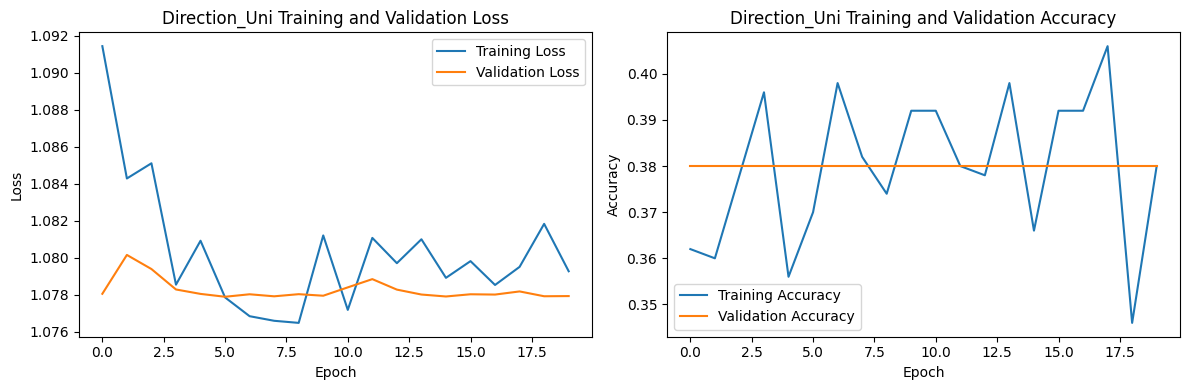

F1-Score for Direction_Uni: 0.1844
Epoch 1/20


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.4245 - loss: 1.0798 - val_accuracy: 0.5300 - val_loss: 1.0638
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.4126 - loss: 1.0360 - val_accuracy: 0.3900 - val_loss: 1.0136
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5181 - loss: 0.9491 - val_accuracy: 0.5200 - val_loss: 0.9513
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6313 - loss: 0.8442 - val_accuracy: 0.5800 - val_loss: 0.8836
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7165 - loss: 0.7012 - val_accuracy: 0.5800 - val_loss: 0.8606
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.7590 - loss: 0.6222 - val_accuracy: 0.6700 - val_loss: 0.7641
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8900 - loss: 0.4479 - val_accuracy: 0.7100 - val_loss: 0.7091
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9402 - loss: 0.2787 - val_accuracy: 0.7200 - val_loss: 0.6922
Epoch 9

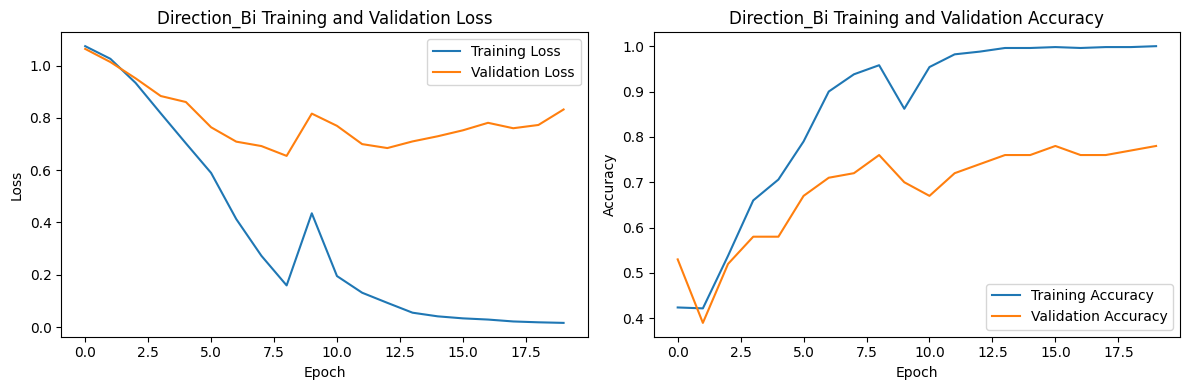

F1-Score for Direction_Bi: 0.7428


In [ ]:
print("\n=== 3. Analisis Pengaruh Jenis LSTM (Unidirectional vs. Bidirectional) ===")
direction_variations = [False, True]
base_lstm_config = [{'units': 64, 'bidirectional': False, 'return_sequences': False}]
for is_bidirectional in direction_variations:
    config = base_lstm_config.copy()
    config[0] = config[0].copy()
    config[0]['bidirectional'] = is_bidirectional
    desc = f"Direction_{'Bi' if is_bidirectional else 'Uni'}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_lstm_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        lstm_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_lstm = keras_model_variant
        best_keras_lstm.save("best_keras_lstm.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{desc} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    acc_key = 'accuracy' if 'accuracy' in history.history else 'sparse_categorical_accuracy'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_sparse_categorical_accuracy'
    plt.plot(history.history[acc_key], label='Training Accuracy')
    plt.plot(history.history[val_acc_key], label='Validation Accuracy')
    plt.title(f'{desc} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")

Jenis LSTM, apakah unidirectional atau bidirectional, memengaruhi cara model memproses konteks dalam sekuens teks. Hasil eksperimen menunjukkan bahwa perubahan dari LSTM unidirectional (F1-score 0.1844) ke bidirectional (F1-score 0.7428) memberikan peningkatan performa yang sangat signifikan. Bidirectional LSTM memungkinkan model untuk menangkap konteks dari arah maju dan mundur, yang sangat penting untuk klasifikasi sentimen, di mana kata-kata di awal dan akhir kalimat sering kali saling memengaruhi. Peningkatan F1-score yang besar menunjukkan bahwa konteks dua arah memungkinkan model untuk lebih akurat mengidentifikasi pola sentimen dalam dataset NusaX-Sentiment. Meskipun bidirectional LSTM meningkatkan kompleksitas komputasi karena menggandakan jumlah parameter, manfaatnya jelas terlihat pada tugas ini. Konfigurasi bidirectional memberikan performa terbaik, menjadikannya pilihan optimal untuk dataset ini.

In [ ]:
print("\n--- Ringkasan F1 Scores LSTM Variants (Keras Model) ---")
for desc, f1_val in results.items():
    print(f"{desc}: {f1_val:.4f}")

if best_keras_lstm is not None:
    best_keras_lstm.save("best_keras_lstm.keras")
    print("Best Keras LSTM model saved as best_keras_lstm.keras")
    print("LSTM Experiment Summary\n")
    print("======================\n")
    print("\nNumber of Layers Analysis\n")
    for i in range(1, 4):
        desc = f"NumLSTMLayers_{i}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print("\nNumber of Units Analysis\n")
    for i in range(1, 4):
        desc = f"NumUnits_{i}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print("\nDirectionality Analysis\n")
    for dir in ['Uni', 'Bi']:
        desc = f"Direction_{dir}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print(f"\nBest Model: F1-Score = {best_f1:.4f}\n")
else:
    print("No model was trained successfully.")


--- Ringkasan F1 Scores LSTM Variants (Keras Model) ---
NumLSTMLayers_1: 0.1844
NumLSTMLayers_2: 0.1844
NumLSTMLayers_3: 0.1844
NumUnits_1: 0.1844
NumUnits_2: 0.1844
NumUnits_3: 0.1827
Direction_Uni: 0.1844
Direction_Bi: 0.7428
Best Keras LSTM model saved as best_lstm_model.keras
LSTM Experiment Summary



Number of Layers Analysis

NumLSTMLayers_1: F1 = 0.1844

NumLSTMLayers_2: F1 = 0.1844

NumLSTMLayers_3: F1 = 0.1844


Number of Units Analysis

NumUnits_1: F1 = 0.1844

NumUnits_2: F1 = 0.1844

NumUnits_3: F1 = 0.1827


Directionality Analysis

Direction_Uni: F1 = 0.1844

Direction_Bi: F1 = 0.7428


Best Model: F1-Score = 0.7428



# Keras vs Manual LSTM Model

In [44]:
if best_keras_lstm is not None:
    lstm_manual = LSTMFromScratch()
    lstm_manual.load_keras_model(best_keras_lstm)
    print("Manual LSTM initialized with best Keras model weights.")
else:
    print("No best Keras model available to load into manual LSTM.")

Processing Keras layer: embedding_39 of type <class 'keras.src.layers.core.embedding.Embedding'>
Processing Keras layer: bidirectional_4 of type <class 'keras.src.layers.rnn.bidirectional.Bidirectional'>
Processing Keras layer: dropout_39 of type <class 'keras.src.layers.regularization.dropout.Dropout'>
Ignoring Dropout layer: dropout_39 during manual inference/training.
Processing Keras layer: dense_39 of type <class 'keras.src.layers.core.dense.Dense'>
Manual LSTM initialized with best Keras model weights.



Predicting with Keras LSTM on 400 samples...
Predicting with Manual LSTM on 400 samples...
Keras LSTM output shape: (400, 3)
Manual LSTM output shape: (400, 3)

Macro F1-Score (Keras LSTM): 0.7428
Macro F1-Score (Manual LSTM): 0.7428
Absolute Difference: 0.000074


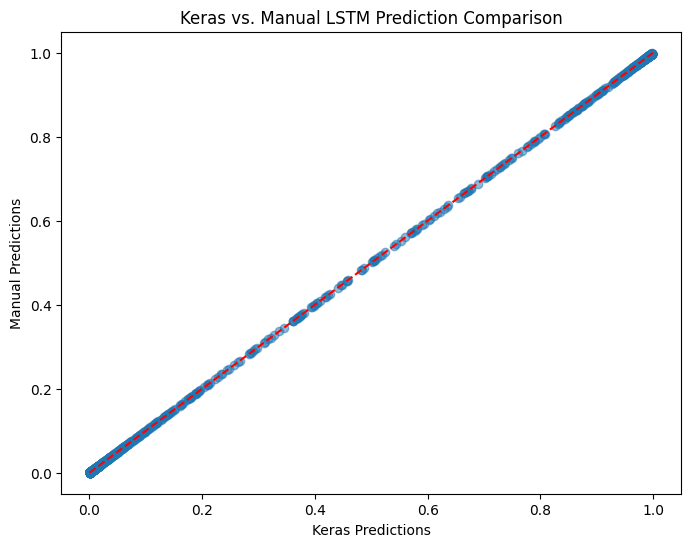

In [45]:
if best_keras_lstm is not None:
    x_test_sample = x_test
    y_test_sample = y_test
    
    print(f"\nPredicting with Keras LSTM on {x_test_sample.shape[0]} samples...")
    y_pred_keras_lstm_proba = best_keras_lstm.predict(x_test_sample, verbose=0)
    
    print(f"Predicting with Manual LSTM on {x_test_sample.shape[0]} samples...")
    y_pred_manual_lstm_proba = lstm_manual.predict(x_test_sample)
    
    print(f"Keras LSTM output shape: {y_pred_keras_lstm_proba.shape}")
    print(f"Manual LSTM output shape: {y_pred_manual_lstm_proba.shape}")
    
    f1_keras_lstm = calculate_f1_macro(y_test_sample, y_pred_keras_lstm_proba, num_classes)
    f1_manual_lstm = calculate_f1_macro(y_test_sample, y_pred_manual_lstm_proba, num_classes)
    
    abs_diff = np.sum(np.abs(y_pred_keras_lstm_proba - y_pred_manual_lstm_proba))
    print(f"\nMacro F1-Score (Keras LSTM): {f1_keras_lstm:.4f}")
    print(f"Macro F1-Score (Manual LSTM): {f1_manual_lstm:.4f}")
    print(f"Absolute Difference: {abs_diff:.6f}")
    assert abs_diff < 1e-3, 'Manual forward pass differs significantly from Keras!'
    
    # Save prediction comparison plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_keras_lstm_proba.flatten(), y_pred_manual_lstm_proba.flatten(), alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Keras Predictions')
    plt.ylabel('Manual Predictions')
    plt.title('Keras vs. Manual LSTM Prediction Comparison')
    plt.show()
else:
    print("Cannot perform prediction comparison due to missing best model.")